In [273]:
import numpy as np
import pandas as pd

In [274]:
path = "dataset/titanic/"

In [275]:
dt_train = pd.read_csv(path+"train.csv")

In [276]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [277]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [278]:
dt_train = dt_train.drop(columns=['Cabin'])

In [279]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [280]:
dt_train['Age'].fillna(round(dt_train['Age'].mean(), 2), inplace=True)

In [281]:
dt_train = dt_train.dropna(subset=['Embarked'])

In [282]:
dt_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [283]:
embarked_cat = dt_train[['Embarked']]
embarked_cat

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [284]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
dt_train_1hot = cat_encoder.fit_transform(embarked_cat)
dt_train_1hot.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [285]:
dt_train = dt_train.replace(['male', 'female'], [0, 1])
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [286]:
dt_train = dt_train.drop(['Embarked'], axis='columns')
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500


In [287]:
corr_matrix = dt_train.corr()
corr_matrix['Survived'].sort_values(ascending=True)

Pclass        -0.335549
Age           -0.074675
SibSp         -0.034040
PassengerId   -0.005028
Parch          0.083151
Fare           0.255290
Sex            0.541585
Survived       1.000000
Name: Survived, dtype: float64

In [288]:
dt_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.653622,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.968367,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,0.000000,29.700000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [306]:
dt_train[dt_train['Fare'] > 263].count()

PassengerId    3
Survived       3
Pclass         3
Name           3
Sex            3
Age            3
SibSp          3
Parch          3
Ticket         3
Fare           3
dtype: int64

In [295]:
import matplotlib.pyplot as plt

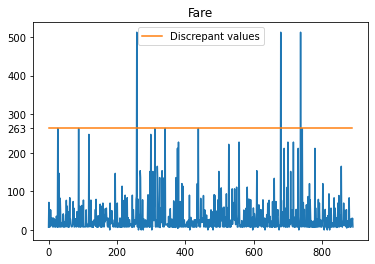

In [321]:
fig = plt.figure()
fig_fare = fig.add_subplot(1,1,1)
fig_fare.plot(dt_train['Fare'])
fig_fare.plot(np.full((889, 1), 263), label='Discrepant values')
fig_fare.legend(loc='best')
fig_fare.set_title('Fare')
fig_fare.set_yticks([0, 100, 200, 263, 300, 400, 500])